In [ ]:
import pandas, warnings

import seaborn as sns

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [ ]:
colors = ["#BC9F8B", "#B5CFB7", "#C5705D", "#ACE1AF", "#B3C8CF"]

def barplot(result, **barlimit):
  if "ylabel" not in barlimit.keys():
    barlimit["ylabel"] = "Total Trip"
  if "color" not in barlimit.keys():
    barlimit["color"] = colors
  bar = result.plot.bar(rot=0, **barlimit)
  for container in bar.containers:
    bar.bar_label(container, fmt="%1.1f")

def pieplot(result, **pieargs):
  if "colors" not in pieargs.keys():
    pieargs["colors"] = colors
  pieargs["ylabel"] = ""
  plot = result.plot.pie(**pieargs);

def lineplot(result, **lineargs):
  plot = result.plot.line(**lineargs)
  plot.set_xticks(result.index);

In [ ]:
url = "/content/originsales.csv"

origin = pandas.read_table(url, sep=",", parse_dates=["order_date", "ship_date"])

origin.iloc[:5, :7]

,order_id,order_date,ship_date,ship_mode,customer_id,customer,segment
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer


In [ ]:
origin.iloc[:5, 7:13]

,country,city,state,postal_code,region,product_id
0,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798
1,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454
2,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240
3,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577
4,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760


In [ ]:
origin.iloc[:5, 13:]

,category,sub_category,product,sales
0,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
origin.isnull().sum().sum()

0

In [ ]:
origin.duplicated().sum()

1

In [ ]:
origin = origin.drop_duplicates()

origin.duplicated().sum()

0

`00`

In [ ]:
total_sales = origin["sales"].sum()

total_sales

2261255.4107

In [ ]:
total_order = origin["order_id"].nunique()

total_order

4922

In [ ]:
year = origin.order_date.dt.year

yearval = {"sales":"sum", "order_id":"nunique"}

columns = {"sales":"total_sales", "order_id":"total_order"}

yearly = origin.groupby(year).agg(yearval).rename(columns=columns)

yearly

,total_sales,total_order
order_date,,
2015,479574.8361,947
2016,459436.0054,1019
2017,600192.5500,1295
2018,722052.0192,1661


In [ ]:
yearly["sales_per_order"] = yearly["total_sales"] / yearly["total_order"]

yearly = yearly.round(3)

yearly

,total_sales,total_order,sales_per_order
order_date,,,
2015,479574.836,947,506.415
2016,459436.005,1019,450.869
2017,600192.550,1295,463.469
2018,722052.019,1661,434.709


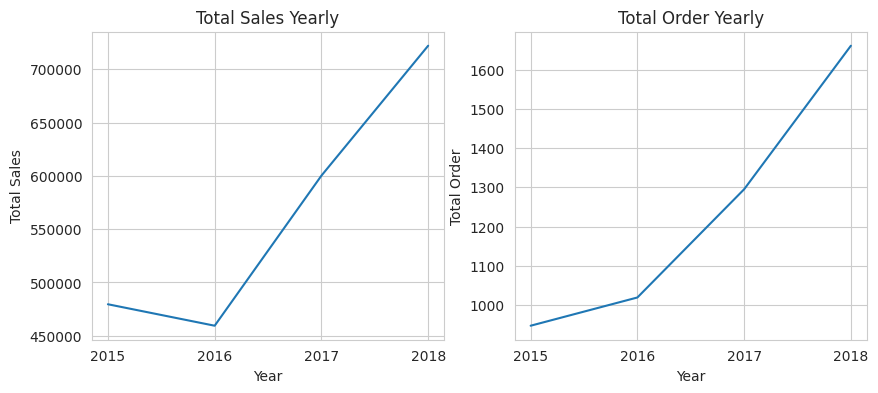

In [ ]:
ylabel_one = "Total Sales"

ylabel_ore = "Total Order"

title_one = ylabel_one + " Yearly"

title_ore = ylabel_ore + " Yearly"

xlabel = "Year"

cate, axes = plt.subplots(1, 2, figsize=(10, 4))

lineplot(yearly.total_sales, title=title_one, ylabel=ylabel_one, xlabel=xlabel, ax=axes[0])

lineplot(yearly.total_order, title=title_ore, ylabel=ylabel_ore, xlabel=xlabel, ax=axes[1])

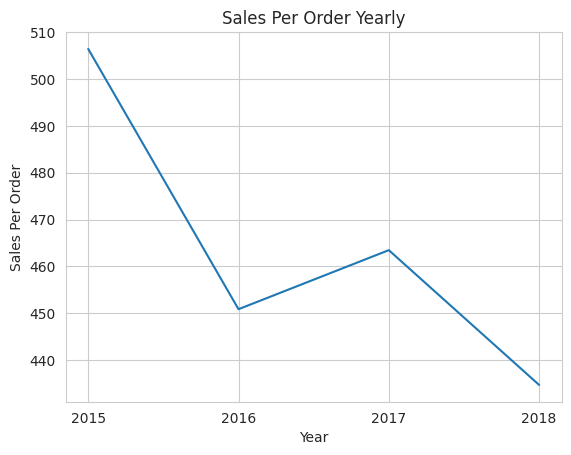

In [ ]:
title = "Sales Per Order Yearly"

lineplot(yearly.sales_per_order, title=title, ylabel="Sales Per Order", xlabel=xlabel)

`01`

In [ ]:
origin["selisih"] = origin["ship_date"] - origin["order_date"]

origin["selisih"] = origin["selisih"].dt.days

origin.iloc[:5, 13:]

,category,sub_category,product,sales,selisih
0,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


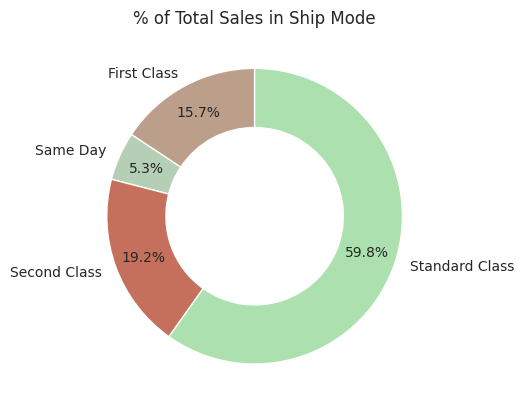

In [ ]:
ordership = origin.groupby("ship_mode")["order_id"].nunique()

title = "% of Total Sales in Ship Mode"

pieplot(
  ordership, title=title,
  autopct='%1.1f%%', startangle=90,
  wedgeprops=dict(width=0.4), pctdistance=0.8
)

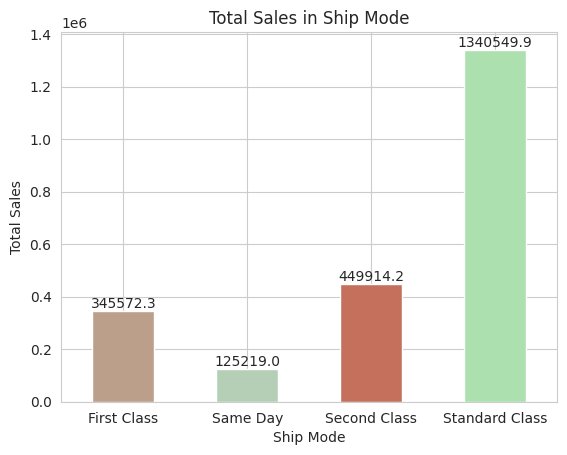

In [ ]:
ordership = origin.groupby("ship_mode")["sales"].sum()

ordership.columns = ["total_sales"]

title = "Total Sales in Ship Mode"

barplot(ordership, title=title, xlabel="Ship Mode", ylabel="Total Sales")

`02`

In [ ]:
customer = origin.groupby("customer").agg({"order_id":"nunique", "sales":"sum"})

customer.columns = ["order", "sales"]

customer["sales_per_order"] = customer["sales"] / customer["order"]

customer.sort_values("sales", ascending=False).iloc[:5]

,order,sales,sales_per_order
customer,,,
Sean Miller,5,25043.050,5008.6100
Tamara Chand,5,19052.218,3810.4436
Raymond Buch,6,15117.339,2519.5565
Tom Ashbrook,4,14595.620,3648.9050
Adrian Barton,10,14473.571,1447.3571


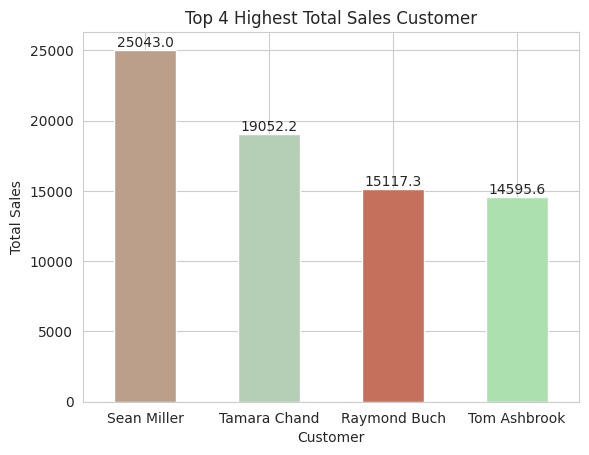

In [ ]:
valuable_customer = customer.sort_values("sales", ascending=False).iloc[:4, 1]

title = "Top 4 Highest Total Sales Customer"

barplot(valuable_customer, title=title, xlabel="Customer", ylabel="Total Sales")

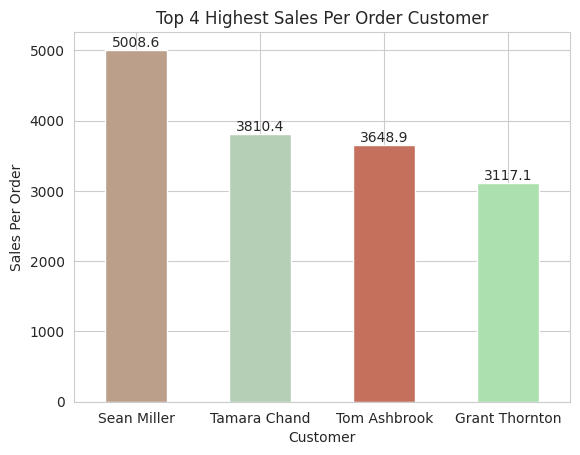

In [ ]:
valuable_customer = customer.sort_values("sales_per_order", ascending=False).iloc[:4, 2]

title = "Top 4 Highest Sales Per Order Customer"

barplot(valuable_customer, title=title, xlabel="Customer", ylabel="Sales Per Order")

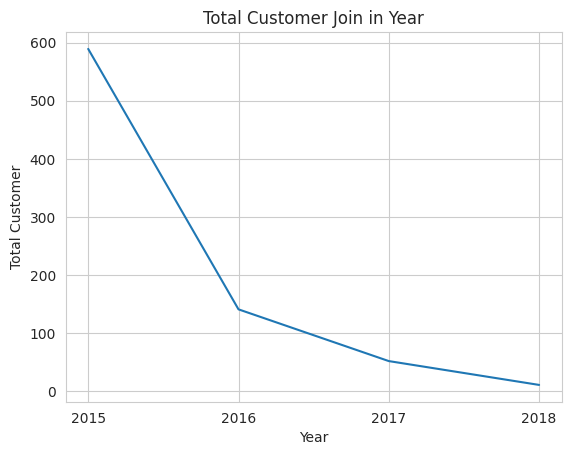

In [ ]:
tahun = origin.groupby("customer")["order_date"].min()

tahun = tahun.dt.year

ratori = tahun.value_counts()

title = "Total Customer Join in Year"

lineplot(ratori, title=title, xlabel="Year", ylabel="Total Customer")

`03`

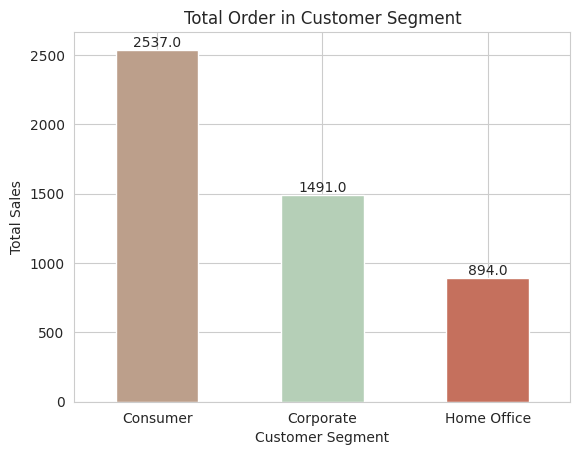

In [ ]:
ordership = origin.groupby("segment").agg({"sales":"sum", "order_id":"nunique"})

ordership.columns = ["sales", "order"]

title = "Total Order in Customer Segment"

barplot(ordership.order, title=title, xlabel="Customer Segment", ylabel="Total Sales")

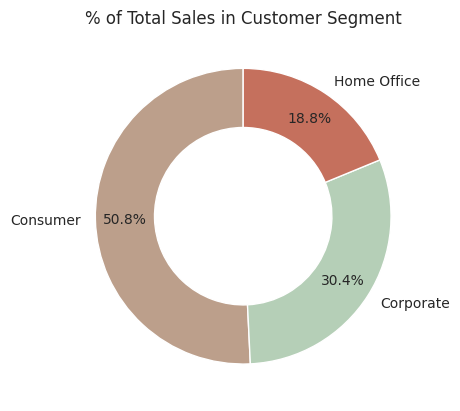

In [ ]:
title = "% of Total Sales in Customer Segment"

pieplot(
  ordership.sales, title=title,
  autopct='%1.1f%%', startangle=90,
  wedgeprops=dict(width=0.4),
  pctdistance=0.8,
)

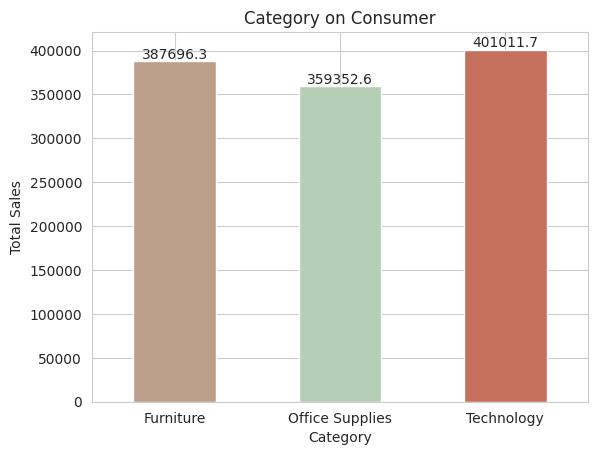

In [ ]:
consumer = origin[origin["segment"] == "Consumer"]

concat = consumer.groupby("category")["sales"].sum()

title = "Category on Consumer"

barplot(concat, title=title, xlabel="Category", ylabel="Total Sales")

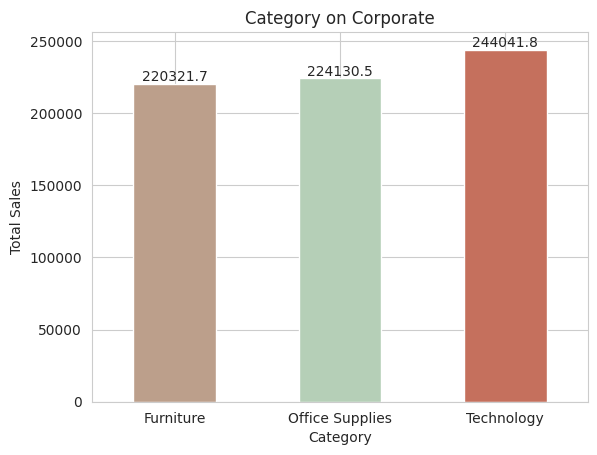

In [ ]:
corporate = origin[origin["segment"] == "Corporate"]

corcat = corporate.groupby("category")["sales"].sum()

title = "Category on Corporate"

barplot(corcat, title=title, xlabel="Category", ylabel="Total Sales")

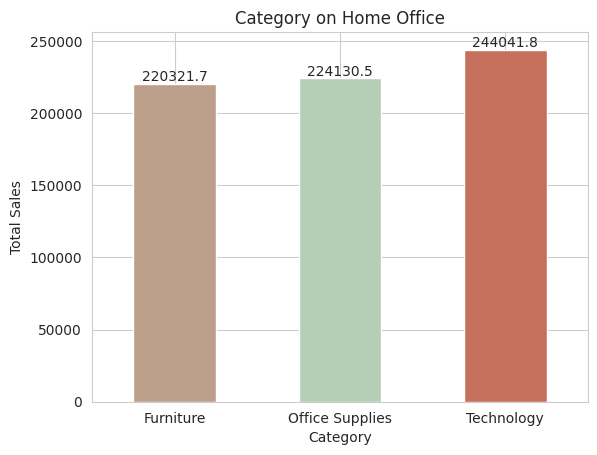

In [ ]:
office = origin[origin["segment"] == "Home Office"]

offcat = office.groupby("category")["sales"].sum()

title = "Category on Home Office"

barplot(corcat, title=title, xlabel="Category", ylabel="Total Sales")